1.1 Plot the populations for the years in the period. Add legend and axis labels to the plot.

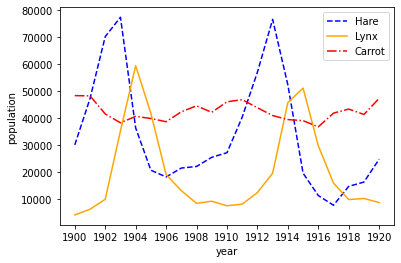

In [145]:
import numpy as np
import matplotlib.pyplot as plt

animals = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = animals[:,0]

plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')

plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()

1.2 Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each species for the years in the period.

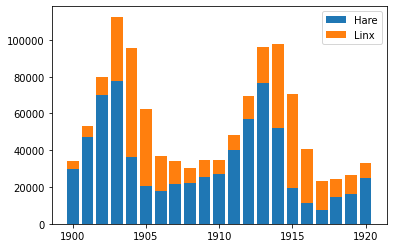

In [146]:
plt.bar(years, animals[:,1], label = 'Hare')
plt.bar(years, animals[:,2], label = 'Linx', bottom = animals[:, 1])

plt.legend()
plt.show()


#часть в комментариях - только отношение числа зайцев к числу лисиц, без отображения общего количества
#total = animals[:, 1] + animals[:, 2]
#plt.bar(years, animals[:, 1] / total, label = 'Hare')
#plt.bar(years, animals[:, 2] / total, label = 'Lynx', bottom = animals[:, 1] / total)

#plt.legend()
#plt.show()

1.3 Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

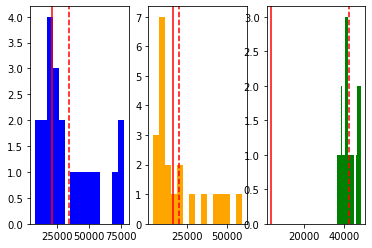

In [147]:
fig, ax = plt.subplots(1,3)

ax[0].hist(animals[:, 1], bins = 15, label = 'Hare', color = 'blue')
ax[0].axvline(animals[:,1].mean(), c = 'red', linestyle = '--')
ax[0].axvline(animals[:,1].std(), c = 'red', linestyle = '-')

ax[1].hist(animals[:, 2], bins = 15, label = 'Lynx', color = 'orange')
ax[1].axvline(animals[:,2].mean(), c = 'red', linestyle = '--')
ax[1].axvline(animals[:,2].std(), c = 'red', linestyle = '-')

ax[2].hist(animals[:, 3], bins = 15, label = 'Carrot', color = 'green')
ax[2].axvline(animals[:,3].mean(), c = 'red', linestyle = '--')
ax[2].axvline(animals[:,3].std(), c = 'red', linestyle = '-')

plt.show()

1.4 Find which year each species had the largest population. Mark these years in the plot of populations.

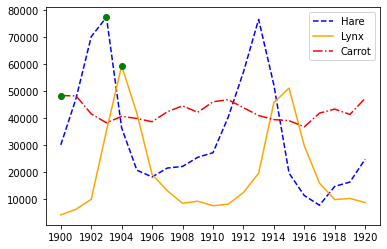

In [148]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years[animals[:, 1].argmax()], animals[:, 1].max(), 'og')

plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years[animals[:, 2].argmax()], animals[:, 2].max(), 'og')

plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')
plt.plot(years[animals[:, 3].argmax()], animals[:, 3].max(), 'og')

plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()

1.5 Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


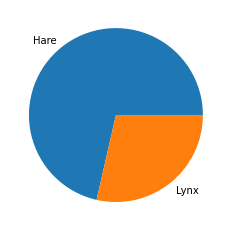

In [149]:
im = (animals[:,1] > animals[:,2]).astype(int)
print(np.array(['H', 'L'])[1 - im])

plt.pie(np.array([np.count_nonzero(im) / im.size, 1 - np.count_nonzero(im) / im.size]), labels = ('Hare', 'Lynx'))
plt.show()

1.6 Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

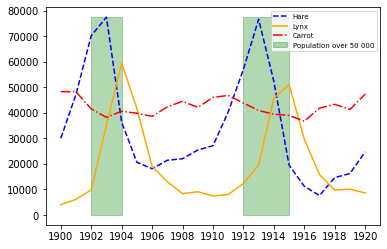

In [150]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')

y = np.max(animals[:,1:])*(np.max(animals[:,1:], axis = 1) > 50000)
plt.fill_between(years, y, where=y>0, color="g", alpha=0.3, label = 'Population over 50 000')

plt.legend(loc = 'best', fontsize = 'x-small')
plt.xticks(years[::2].astype(int))
plt.show()

1.7 Find the top 2 years for each species when they had the lowest populations.

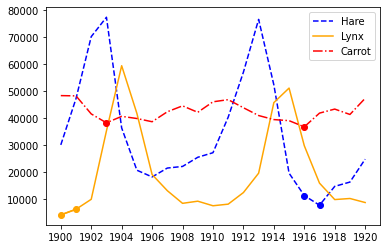

In [151]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
n = np.argsort(animals[:,1])
plt.plot(years[n[0:2]], animals[n[0:2],1], 'ob')

plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
n = np.argsort(animals[:,2])
plt.plot(years[n[0:2]], animals[n[0:2],2], marker = 'o', color = 'orange')

plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')
n = np.argsort(animals[:,3])
plt.plot(years[n[0:2]], animals[n[0:2],3], 'or')

plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()

1.8 Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

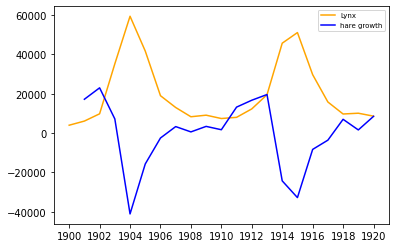

[[ 1.         -0.69334852]
 [-0.69334852  1.        ]]


In [152]:
plt.plot(years, animals[:,2], label = 'Lynx', color = 'orange')
plt.plot(years[1:], np.diff(animals[:,1]), label = 'hare growth', color = 'blue')

plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.xticks(years[::2].astype(int))
plt.show()

print(np.corrcoef(np.diff(animals[:,1]), animals[:-1,2]))

1.9 Show population of hares vs carrots and hares vs lynxes.

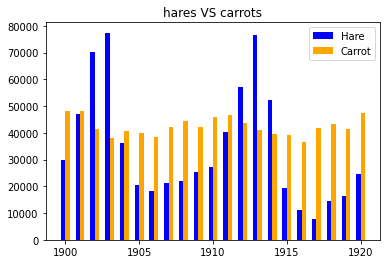

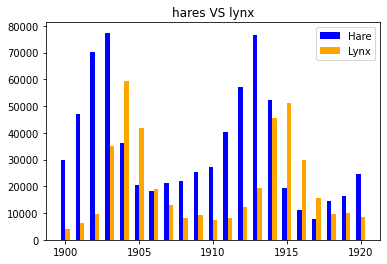

In [154]:
plt.bar(years - 0.15, animals[:,1], width = 0.3, label = 'Hare', color = 'blue')
plt.bar(years + 0.15, animals[:,3], width = 0.3, label = 'Carrot', color = 'orange')
plt.title('hares VS carrots')

plt.legend()
plt.show()

plt.bar(years - 0.15, animals[:,1], width = 0.3, label = 'Hare', color = 'blue')
plt.bar(years + 0.15, animals[:,2], width = 0.3, label = 'Lynx', color = 'orange')
plt.title('hares VS lynx')

plt.legend()
plt.show()

1.10 Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

0.04048582995951422


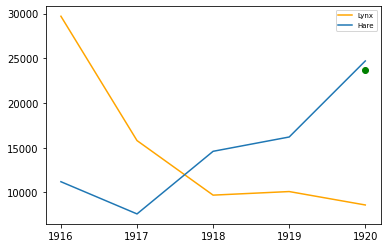

In [156]:
plt.plot(years[16:], animals[16:,2], label = 'Lynx', color = 'orange')
plt.plot(years[16:], animals[16:,1], label = 'Hare')

plt.plot(years[-1], animals[-2,1] - np.diff(animals[:,2])[-1] + np.diff(animals[:,3])[-1], 'og')

print(1 - (animals[-2,1] - np.diff(animals[:,2])[-1] + np.diff(animals[:,3])[-1]) / animals[-1,1])

plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.xticks(years[16:].astype(int))
plt.show()

2. Plot a graph of total explained variance vs number of principal components.

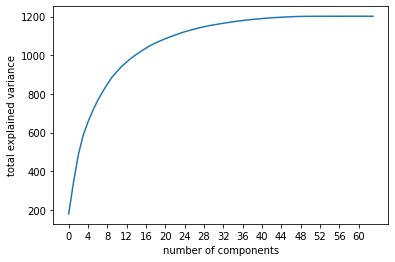

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()

#Variances along eigenvectors:
n = np.arange(64)
pca_comp = np.ones(64)

for i in n:
  pca = PCA(n_components = i+1)
  pca.fit_transform(digits.data.astype(float))
  pca_comp[i] = np.sum(pca.explained_variance_) 

plt.plot(n, pca_comp)
plt.xticks(n[0::4].astype(int))
plt.xlabel('number of components')
plt.ylabel('total explained variance')
plt.show()

3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [158]:
pca_comp = pca_comp / pca_comp[-1]

number = np.arange(64)
numbers = np.arange(4)

for i in range(0,4):
  numbers[i] = number[pca_comp >= [0.99, 0.95, 0.90, 0.85][i]][0]

print(numbers)

[40 28 20 16]


4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

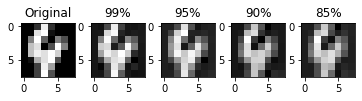

In [159]:
k = 1567
fig, ax = plt.subplots(1, 5)
ax[0].imshow(digits.images[k], cmap='gray')

for i in range(0,4):
  pca = PCA(n_components = numbers[i])
  ax[i+1].imshow(pca.inverse_transform(pca.fit_transform(digits.data.astype(float)))[k].reshape(8, 8), cmap='gray')

ax[0].set_title('Original')
ax[1].set_title('99%')
ax[2].set_title('95%')
ax[3].set_title('90%')
ax[4].set_title('85%')

plt.subplots_adjust(wspace=0.3)
plt.show()